# Homework 2
## 2.3 Naïve Bayes (NB) in Python with Labeled Text Data

#### In this section, I used Naive Bayes to predict sentiment analysis for test data Naive Bayes is a classification method based on Bayes’ Theorem and the assumption of predictor independence. It performs well in the case of categorical input variables compared to the numerical variables. I want to predict result which are negative, neutral, positive by using naive bayes. 

First, split the dataset into train and test


Second, train Multinomial Naive Bayes model to predict text in x_test and calculate the accuracy


Finally, Make several visualizations and gather a conclusion. 

In [1]:
# Import required packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

#### Import and split the data 

In [91]:
tweettext = pd.read_csv("/Users/yangyilin/Desktop/anly-501-project-YilinYang2000-1/data/00-raw-data/pytweetresult.csv")
x_train,x_test,y_train,y_test=train_test_split(tweettext['text'],tweettext['result'],test_size=0.2)

In [92]:
tweettext.head()

,Unnamed: 0,text,result,scores
0,0,RT @relyanceai: Action by California Attorney ...,Neutral,100.0
1,1,Join @IDology and @AiteNovarica on October 12t...,Positive,6.6
2,2,RT @relyanceai: Action by California Attorney ...,Neutral,100.0
3,3,Action by California Attorney General Shows En...,Positive,10.7
4,4,RT @deanhager: Welcome @ZecOps to the @JamfSof...,Positive,34.6


In [5]:
Encoder = LabelEncoder()
Y_train = Encoder.fit_transform(y_train) #Transform Y_train, Y_test value into 0,1,2
Y_test= Encoder.fit_transform(y_test)


In [7]:
x_train.head()

102    Action by California Attorney General Shows En...
157    RT @SalingerPrivacy: Dr Kemp raises important ...
272    RT @kaspersky: Our new consumer portfolio aim ...
454    RT @SalingerPrivacy: Dr Kemp raises important ...
216    Build a Consumer Privacy-Aware Culture Through...
Name: text, dtype: object

In [8]:
x_test.head()

57     RT @1DavidClarke: Top story: @rootconf: '#Root...
314    Build a Consumer Privacy-Aware Culture Through...
27     On data breaches and impact on consumer data p...
284    RT @kaspersky: Our new consumer portfolio aim ...
283    Apply Today: Counsel, Data Privacy &amp; Consu...
Name: text, dtype: object

#### Naive Bayes Classification

For text classification, it is more suitable to use multinomial Naive Bayes Model. I built a model to fit x_train and Y_train, then make a prediction for x_test to determine whether Naive Bayes is a suitable model for sentiment analysis of prediction. 

In [13]:
#Use multinomial Naive Bayes model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(x_train,Y_train)
y_pred = model.predict(x_test)
print("Accuracy: ",accuracy_score(y_pred, Y_test)*100)

Accuracy:  93.27731092436974


Text(0.5, 1.0, 'predicted vs true')

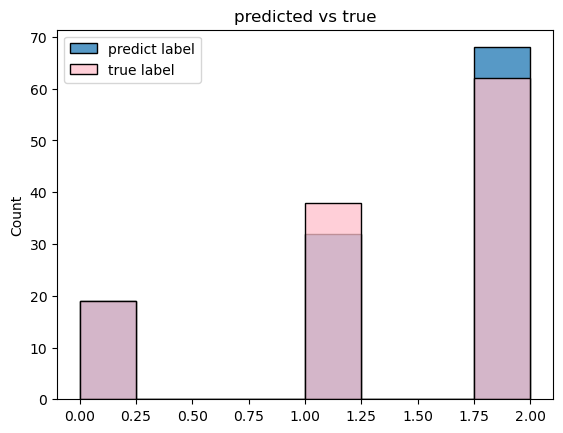

In [14]:
newdf = pd.DataFrame(y_pred)
sns.histplot(y_pred)
sns.histplot(Y_test,color='pink')
plt.legend(labels=["predict label","true label"])
plt.title("predicted vs true")

From this plot, we can see the true labels are nearly as similar as predicted label. There is a few misclassification here. In the neutral column and positive column which are 1 and 2, there are a few misclassifications. But we can conclude that naive bayes is a good model here. We can enlarge train data in order to avoid some misclassifications. 

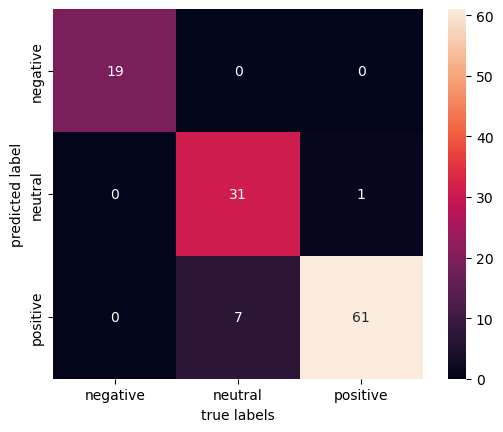

In [15]:
mat = confusion_matrix(Y_test, y_pred)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d",yticklabels = ['negative','neutral','positive'], xticklabels= ['negative','neutral','positive'])
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

In the heatmap shows above, it clearly shows the attitude distribution which are negative, neutral, positive between true labels and predicted labels. As we can see, the misclassification is low. 

In [17]:
mat

array([[19,  0,  0],
       [ 0, 31,  7],
       [ 0,  1, 61]])

#### Further prediction for using Naive Bayes to predict scores of each text
From previous dataset, it not only defined attitude of each text, it also defined scores for each text. I would like to figure our whether a Naive Bayes Model is suitable for predict scores of each text. 


First, calculate the frequencies of each scores and trying to bin them into different range


Second, split the dataset into train and test


Third, train Multinomial Naive Bayes model to predict text in x_test and calculate the accuracy


Finally Make several visualizations and gather a conclusion. 

In [77]:
freq = tweettext['scores'].value_counts().rename_axis('scores').reset_index(name='counts')


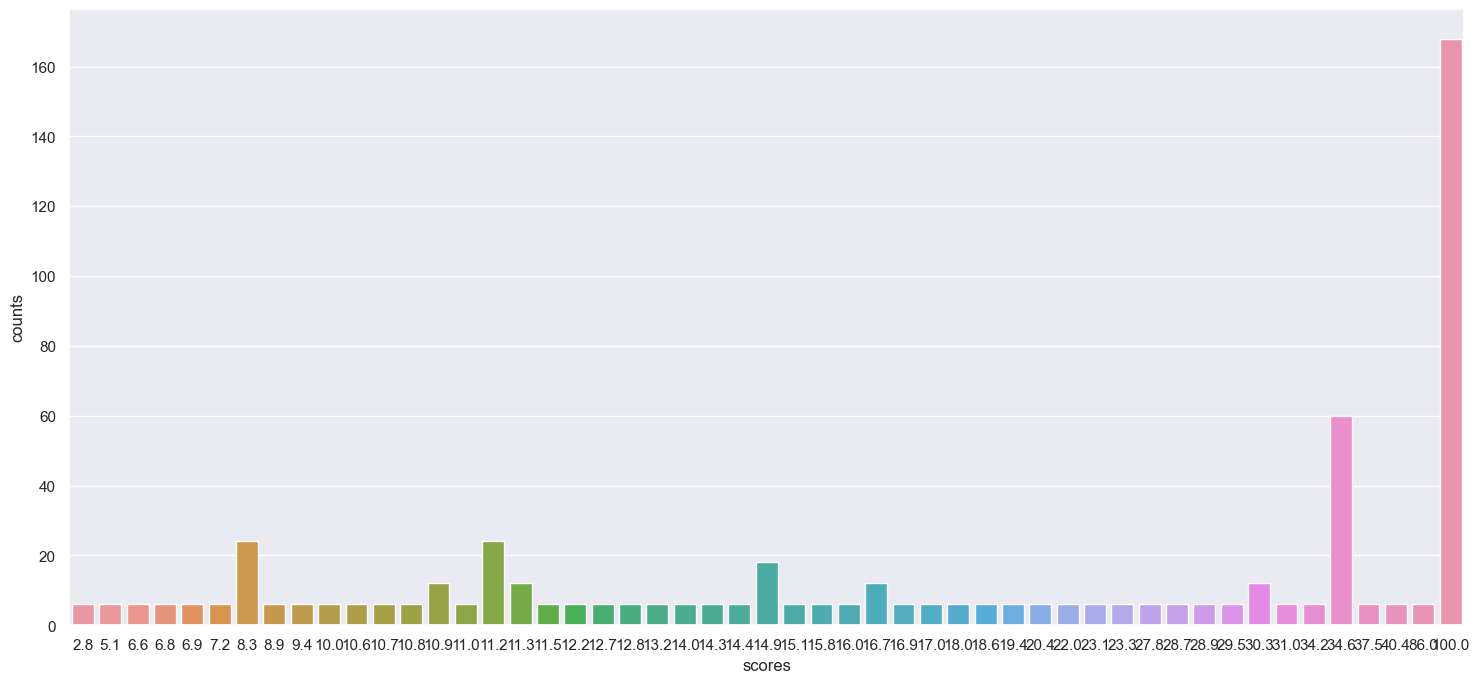

In [68]:
sns.barplot(x=freq.scores, y=freq.counts)
sns.set(rc={'figure.figsize':(30,18)})

From the plot, it clearly shows the distribution of each scores. At this time, because the scores' types are too many, we need to bin them

Classified each score to 5 ranges

First, we can find the max and min values of scores

In [23]:
min_value = tweettext['scores'].min()
max_value = tweettext['scores'].max()
print(min_value)
print(max_value)

2.8
100.0


We can use the linspace() function of the numpy package to calculate the 6 bins, equally distributed.

In [81]:
bins = np.linspace(min_value,max_value,4)
bins

array([  2.8,  35.2,  67.6, 100. ])

Now we define the labels:

In [82]:
labels = ['low','medium','high']

We can use the cut() function to convert the numeric values of the scores into the categorical values. We need to specify the bins and the labels. In addition, we set the parameter include_lowest to True in order to include also the minimum value.

In [87]:
tweettext['scoresrange'] = pd.cut(tweettext['scores'], bins=bins, labels=labels, include_lowest=True)

0        high
1         low
2        high
3         low
4         low
        ...  
589    medium
590       low
591       low
592       low
593       low
Name: scoresrange, Length: 594, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

##### Split datset into train and test

In [84]:
x_train,x_test,y_train,y_test=train_test_split(tweettext['text'],tweettext['scoresrange'],test_size=0.2)

#### Train a Naive Bayes Model and make a prediction

In [85]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(x_train,Y_train)
y_pred = model.predict(x_test)
print("Accuracy: ",accuracy_score(y_pred, Y_test)*100)

Accuracy:  42.857142857142854


The accuracy is low here, so we can predict that the Naive Bayes is not suitable for predict scores in each text. 

Text(0.5, 1.0, 'predicted vs true')

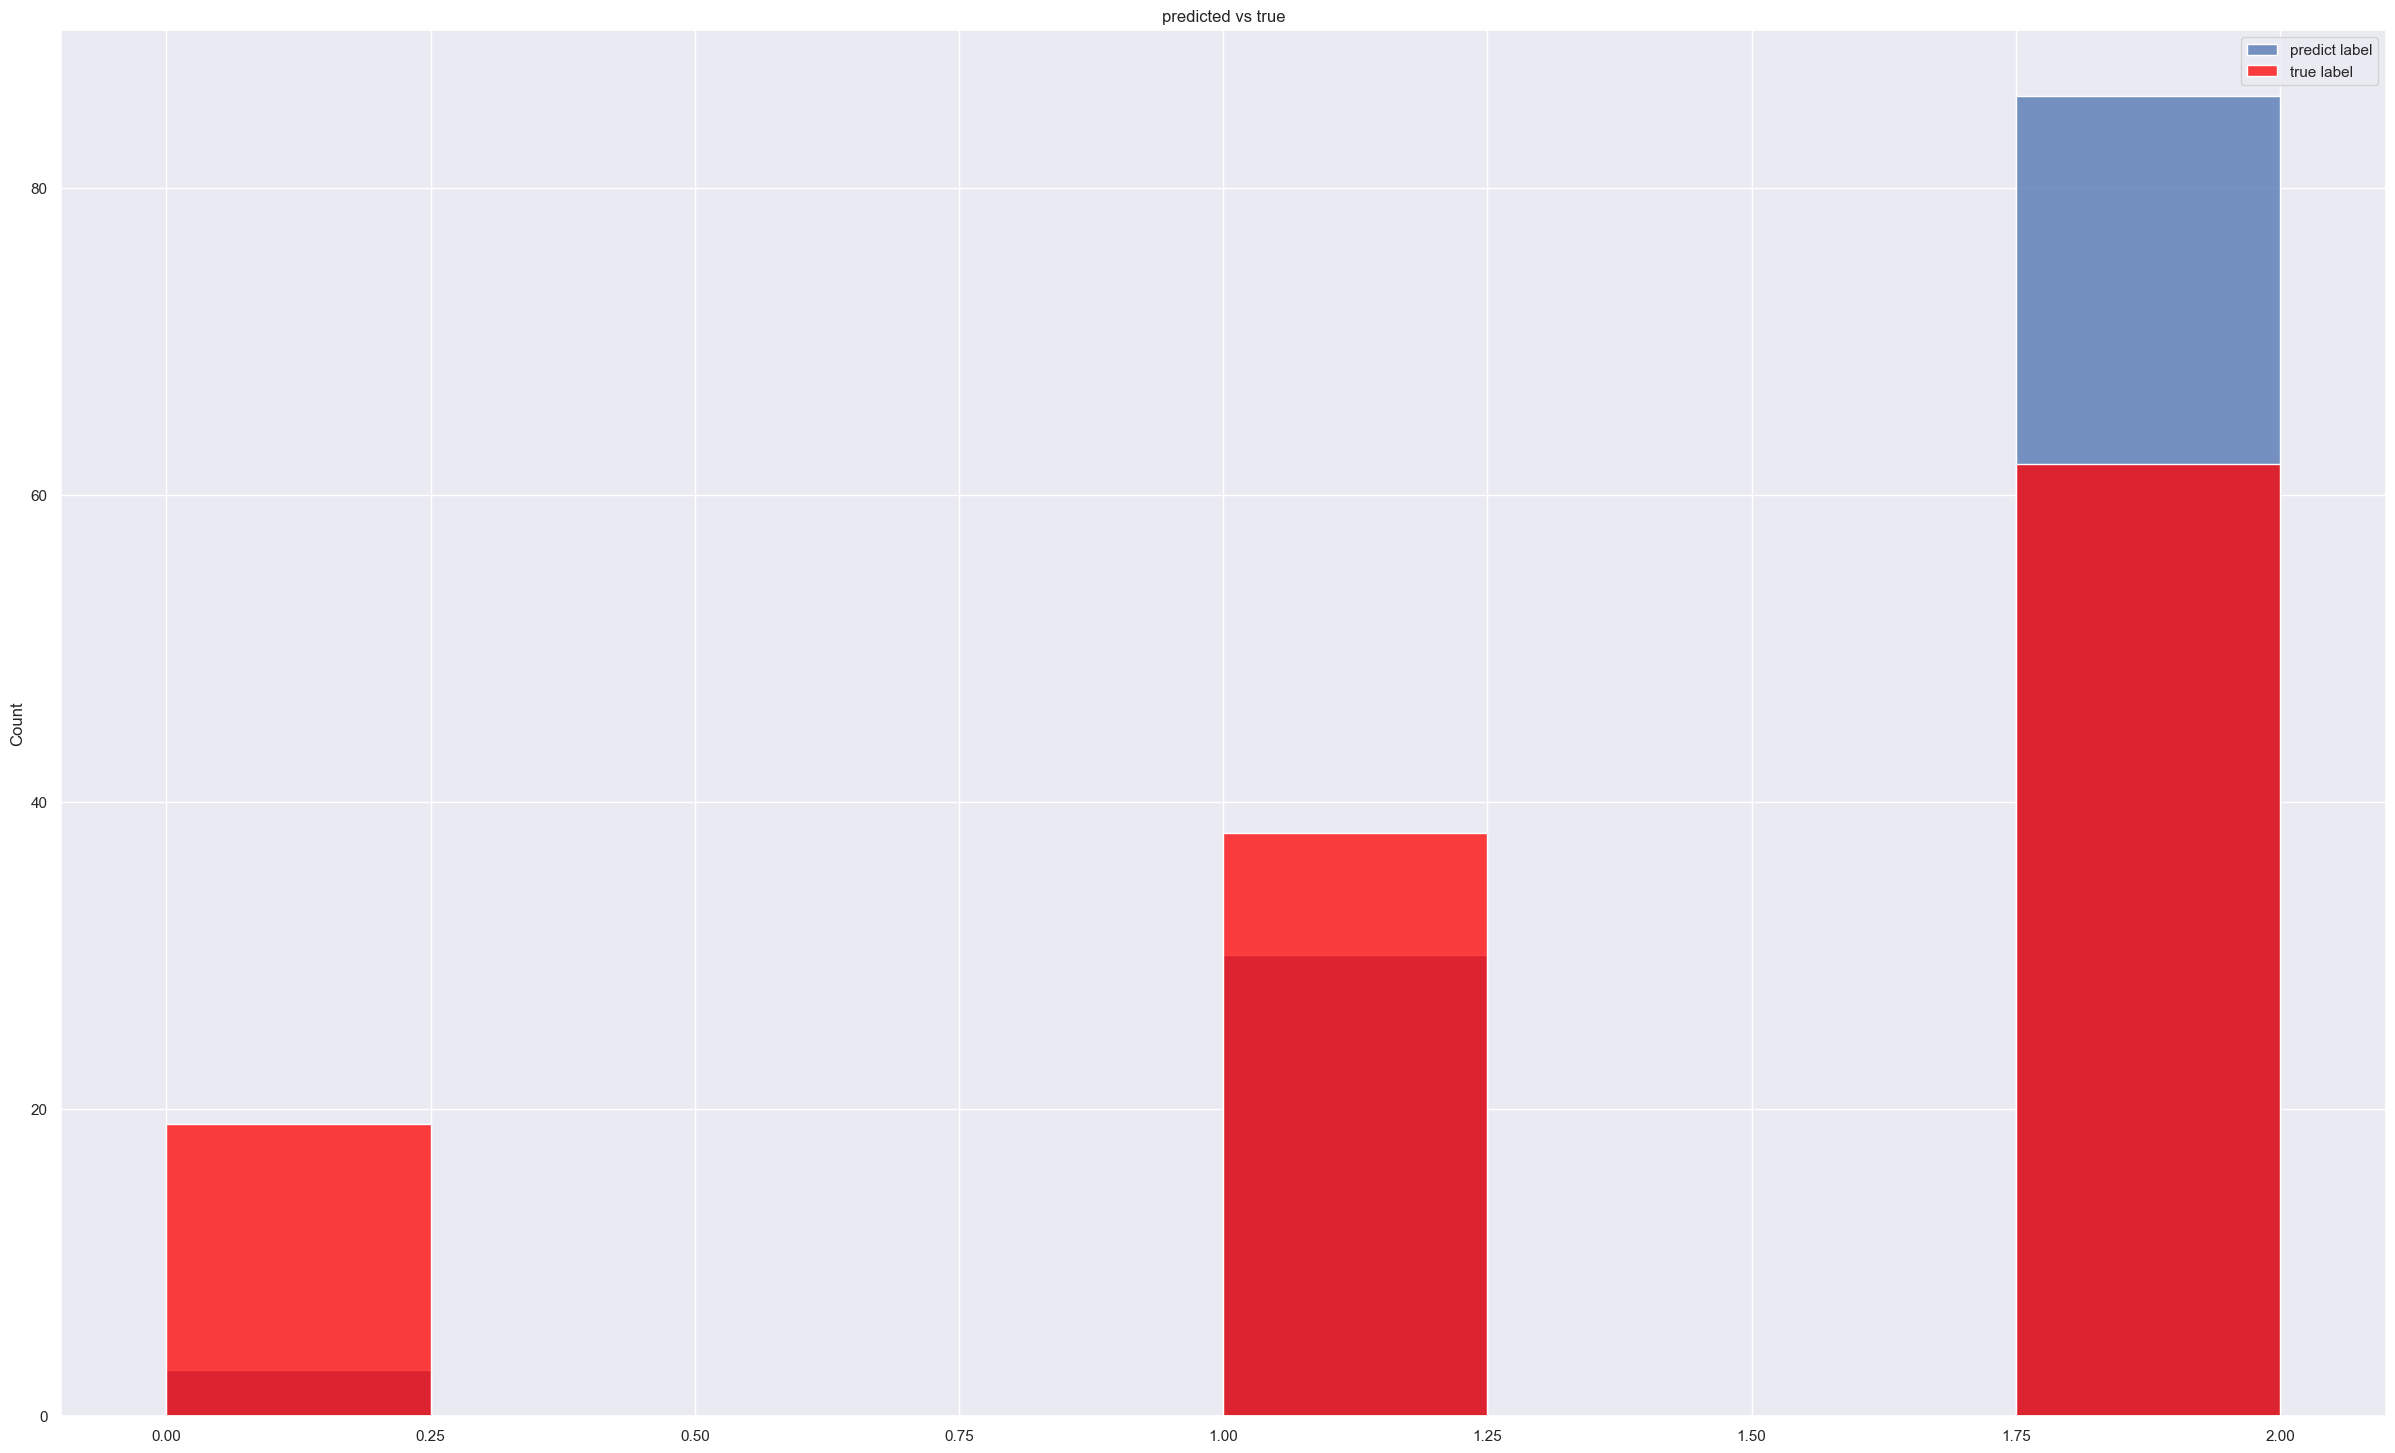

In [86]:
newdf = pd.DataFrame(y_pred)
sns.histplot(y_pred)
sns.histplot(Y_test,color='red')
plt.legend(labels=["predict label","true label"])
plt.title("predicted vs true")

As the plot shows, there are a lot of misclassification during the Naive baye prediction. 

#### Conclusion
Naive Bayes in here is a great model to predict sentiment attitude. As we can see, the accuracy score is about 97.47. It means we only have about 2.5% misclassification. This can leads us to conclude that the attitude variable is independent. The Naive Bayes classifier is much faster with its probability calculations. This is the kind of algorithm used when all features follow a normal distribution. All features are continuous valued. The assumption is that there is no covariance between the independent features. We can further this model to analysis bigger dataset's sentiment. In the following research, I will utilize more twitter api to gather the customers' attitudes about consumer privacy, at this time, the naive bayes can be a useful tool to predict that. 

However, for the further prefiction of each text's score, the Naive Bayes is not a good model for prediction. I will try different model to predict that. 